In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from eisfit.circuits import Randles, DefineCircuit, BaseCircuit
from eisfit.preprocessing import readFile

In [2]:
# read data
data = np.genfromtxt('eisfit/tests/Z1tofit.csv', delimiter=',')

In [3]:
frequencies = data[:,0]
Z = data[:,1] + 1j*data[:,2]


-------------------------------
Circuit: Randles
Circuit string: R_0-p(R_1,C_1)-W_1/W_2
Algorithm: leastsq
Fit: False
Initial guesses:
	R_0 = 1.00e-02
	R_1 = 5.00e-03
	C_1 = 1.00e-01
	W_1 = 1.00e-03
	W_2 = 2.00e+02

-------------------------------


-------------------------------
Circuit: Randles
Circuit string: R_0-p(R_1,C_1)-W_1/W_2
Algorithm: leastsq
Fit: True
Fit parameters:
	R_0 = 1.87e-02
	R_1 = 1.17e-02
	C_1 = 1.36e+00
	W_1 = 8.86e-01
	W_2 = 4.78e+04

-------------------------------



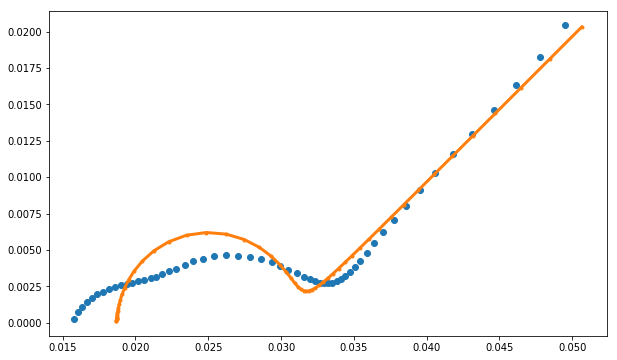

In [4]:
# instantiate the circuit and fit it to the data
circuit = DefineCircuit(initial_guess=[.01, .005, .1, .005, .1, .001, 200], circuit='R_0-p(R_1,C_1)-p(R_1,C_1)-W_1/W_2')

circuit = Randles(initial_guess=[.01, .005, .1, .7, .001, 200], CPE=True)
circuit = Randles(initial_guess=[.01, .005, .1, .001, 200])

print('circuit)
circuit.fit(frequencies[np.imag(Z) < 0], Z[np.imag(Z) < 0])
print(circuit)
Z_fit = circuit.predict(frequencies[np.imag(Z) < 0])

# plot the data and the fit
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(np.real(Z[np.imag(Z) < 0]), -np.imag(Z[np.imag(Z) < 0]), 'o')
ax.plot(np.real(Z_fit), -np.imag(Z_fit), '.-', lw=3)
ax.set_aspect('equal')

plt.show()

In [7]:
circuit.initial_guess

[0.01, 0.005, 0.1, 0.001, 200]

In [24]:
isinstance(frequencies[0], (float, int, np.float64, np.int32))

True

In [5]:
circuit = 'R_0-p(R_1,C_1)-W_1/W_2'

In [17]:
circuit = 'R_0-p(R_1,C_1)-W_1/W_2'
circuit = circuit.replace('p', '').replace('(','').replace(')', '')
names = circuit.replace(',','-').replace('/','-').split('-')
names

['R_0', 'R_1', 'C_1', 'W_1', 'W_2']

In [9]:
[x.split('/') for x in circuit.split('-')]

[['R_0'], ['p(R_1,C_1)'], ['W_1', 'W_2']]

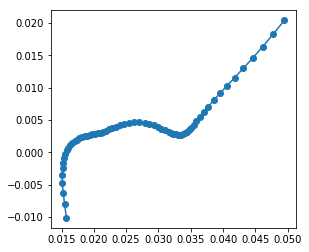

In [2]:
f, Z = readFile('./examples/data/exampleData.csv')

fig, ax = plt.subplots()
plt.plot(Z.real, -Z.imag, 'o-')
ax.set_aspect('equal')
plt.show()

In [3]:
filename = './Chalco-in-buffer-50mV.DTA'

with open(filename, 'r', encoding='ISO-8859-1') as input:
        lines = input.readlines()

In [5]:
for i, line in enumerate(lines):
    if 'ZCURVE' in line:
        start_line = i

In [7]:
raw_data = lines[start_line + 3:]
f, Z = [], []
for line in raw_data:
    each = line.split()
    f.append(float(each[2]))
    Z.append(complex(float(each[3]), float(each[4])))

In [16]:
np.array(Z).imag

array([-1367.239  , -1502.195  , -1621.813  , -1672.93   , -1668.395  ,
       -1620.144  , -1506.859  , -1407.856  , -1266.296  , -1091.802  ,
        -947.1432 ,  -813.0331 ,  -704.9116 ,  -606.206  ,  -516.6904 ,
        -439.2898 ,  -382.0586 ,  -327.8677 ,  -279.8773 ,  -247.0336 ,
        -214.7129 ,  -187.785  ,  -163.6504 ,  -146.0875 ,  -128.724  ,
        -114.1715 ,  -105.0351 ,   -95.6213 ,   -88.8763 ,   -82.36904,
         -77.56557,   -73.49171,   -70.95162,   -68.13791,   -69.87909,
         -68.70265,   -73.79854,   -78.35508,   -81.94554,   -94.86475,
        -104.9407 ,  -122.1189 ,  -142.8908 ,  -164.5738 ,  -195.5508 ,
        -228.205  ,  -275.2808 ,  -321.6813 ,  -387.5287 ,  -470.5144 ,
        -558.4168 ,  -655.9384 ,  -773.8778 ,  -913.8754 , -1069.582  ,
       -1243.894  , -1440.5    , -1644.846  , -1891.697  , -2170.397  ,
       -2427.713  , -2737.648  , -3059.258  , -3423.424  , -3800.406  ,
       -4165.968  , -4477.789  , -4931.03   , -5301.367  , -5703

In [15]:
'array([  825.8584,  1100.361 ,  1401.721 ,  1739.625 ,  2087.403 , 2422.298 ,  2720.257 ,  2982.016 ,  3212.336 ,  3359.629 , 3499.298 ,  3598.306 ,  3688.117 ,  3766.628 ,  3808.92  , 3842.264 ,  3902.565 ,  3927.298 ,  3944.01  ,  3987.966 , 3998.507 ,  4029.045 ,  4044.939 ,  4077.349 ,  4068.979 , 4072.986 ,  4078.837 ,  4107.241 ,  4130.96  ,  4143.088 , 4164.664 ,  4183.986 ,  4206.823 ,  4225.685 ,  4230.309 , 4228.707 ,  4242.562 ,  4250.716 ,  4219.722 ,  4208.409 , 4203.486 ,  4213.595 ,  4241.487 ,  4258.891 ,  4295.819 , 4297.472 ,  4313.771 ,  4361.165 ,  4408.525 ,  4430.184 , 4495.299 ,  4571.314 ,  4632.138 ,  4753.051 ,  4889.047 , 5038.293 ,  5218.515 ,  5444.164 ,  5926.305 ,  6461.792 , 7343.626 ,  7986.202 ,  8435.127 ,  8973.929 , 10123.93  , 10823.63  , 11628.01  , 12514.52  , 13482.75  , 14713.85  , 15701.81  , 17007.49  ])'.replace(' ', '').replace(',', ', ')


'array([825.8584, 1100.361, 1401.721, 1739.625, 2087.403, 2422.298, 2720.257, 2982.016, 3212.336, 3359.629, 3499.298, 3598.306, 3688.117, 3766.628, 3808.92, 3842.264, 3902.565, 3927.298, 3944.01, 3987.966, 3998.507, 4029.045, 4044.939, 4077.349, 4068.979, 4072.986, 4078.837, 4107.241, 4130.96, 4143.088, 4164.664, 4183.986, 4206.823, 4225.685, 4230.309, 4228.707, 4242.562, 4250.716, 4219.722, 4208.409, 4203.486, 4213.595, 4241.487, 4258.891, 4295.819, 4297.472, 4313.771, 4361.165, 4408.525, 4430.184, 4495.299, 4571.314, 4632.138, 4753.051, 4889.047, 5038.293, 5218.515, 5444.164, 5926.305, 6461.792, 7343.626, 7986.202, 8435.127, 8973.929, 10123.93, 10823.63, 11628.01, 12514.52, 13482.75, 14713.85, 15701.81, 17007.49])'

In [17]:
'array([-1367.239  , -1502.195  , -1621.813  , -1672.93   , -1668.395  ,-1620.144  , -1506.859  , -1407.856  , -1266.296  , -1091.802  ,-947.1432 ,  -813.0331 ,  -704.9116 ,  -606.206  ,  -516.6904 ,-439.2898 ,  -382.0586 ,  -327.8677 ,  -279.8773 ,  -247.0336 ,-214.7129 ,  -187.785  ,  -163.6504 ,  -146.0875 ,  -128.724  ,-114.1715 ,  -105.0351 ,   -95.6213 ,   -88.8763 ,   -82.36904,-77.56557,   -73.49171,   -70.95162,   -68.13791,   -69.87909,-68.70265,   -73.79854,   -78.35508,   -81.94554,   -94.86475,-104.9407 ,  -122.1189 ,  -142.8908 ,  -164.5738 ,  -195.5508 ,-228.205  ,  -275.2808 ,  -321.6813 ,  -387.5287 ,  -470.5144 ,-558.4168 ,  -655.9384 ,  -773.8778 ,  -913.8754 , -1069.582  ,-1243.894  , -1440.5    , -1644.846  , -1891.697  , -2170.397  ,-2427.713  , -2737.648  , -3059.258  , -3423.424  , -3800.406  ,-4165.968  , -4477.789  , -4931.03   , -5301.367  , -5703.416  ,-6161.72   , -6635.557  ])'.replace(' ', '').replace(',', ', ')

'array([-1367.239, -1502.195, -1621.813, -1672.93, -1668.395, -1620.144, -1506.859, -1407.856, -1266.296, -1091.802, -947.1432, -813.0331, -704.9116, -606.206, -516.6904, -439.2898, -382.0586, -327.8677, -279.8773, -247.0336, -214.7129, -187.785, -163.6504, -146.0875, -128.724, -114.1715, -105.0351, -95.6213, -88.8763, -82.36904, -77.56557, -73.49171, -70.95162, -68.13791, -69.87909, -68.70265, -73.79854, -78.35508, -81.94554, -94.86475, -104.9407, -122.1189, -142.8908, -164.5738, -195.5508, -228.205, -275.2808, -321.6813, -387.5287, -470.5144, -558.4168, -655.9384, -773.8778, -913.8754, -1069.582, -1243.894, -1440.5, -1644.846, -1891.697, -2170.397, -2427.713, -2737.648, -3059.258, -3423.424, -3800.406, -4165.968, -4477.789, -4931.03, -5301.367, -5703.416, -6161.72, -6635.557])'